In [6]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, f1_score

from DataLoader import DataLoader
from Preprocess import Preprocessing
import numpy as np

In [5]:
data_loader = DataLoader()
data = data_loader.get_processed_source()
#preprocessing = Preprocessing(data)
#feature_df = preprocessing.preprocess()
feature_df= pd.read_csv("data/features.csv")

tox21 = pd.read_csv('data/tox21.csv')
label_columns = ['SR-HSE','NR-AR', 'SR-ARE', 'NR-Aromatase', 'NR-ER-LBD', 'NR-AhR', 'SR-MMP',\
       'NR-ER', 'NR-PPAR-gamma', 'SR-p53', 'SR-ATAD5', 'NR-AR-LBD']
targets = tox21[label_columns]

[15:53:16] The 2 defining bonds for an atropisomer are co-planar - atoms are: 4 10
[15:53:16] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[15:53:16] ERROR: Could not sanitize molecule ending on line 21572
[15:53:16] ERROR: Explicit valence for atom # 3 Cl, 2, is greater than permitted
[15:53:16] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 1 ignored.
[15:53:16] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 1 ignored.
[15:53:16] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 6 ignored.
[15:53:16] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 6 ignored.
[15:53:16] The 2 defining bonds for an atropisomer are co-planar - atoms are: 4 10
[15:53:17] Explicit valence for atom # 2 Si, 8, is greater than permitted
[15:53:17] ERROR: Could not sanitize molecule ending on line 346021
[15:53:17] ERROR: Explicit valence for atom # 

In [7]:
def counter_plot(target:pd.core.frame.DataFrame)->None:
    """
    Given a target dataframe, provides a historgram of the distribution of positive, negative and null columns.
    """
    count = {}
    for cols in target.columns:
        temp = target[cols].fillna('NAN') 
        count[cols] = temp.value_counts().to_dict()

    zeros = [count[t][0] for t in targets]
    ones = [count[t][1] for t in targets]
    nans = [count[t]['NAN'] for t in targets]

    fig = plt.figure(figsize = (15,10))
    ax = fig.add_subplot(111)
    width = 0.3
    rects1 = ax.bar(np.arange(12), zeros, width, color='r')
    rects2 = ax.bar(np.arange(12) + 0.3, ones, width, color='g')
    rects3 = ax.bar(np.arange(12)+ 2*0.3, nans, width, color='b')
    
    ind = np.arange(12)

    ax.set_ylabel('Amount')
    ax.set_xticks(ind+width)
    ax.set_xticklabels( targets, rotation=90) 
    ax.legend( (rects1[0], rects2[0], rects3[0]), ('Negative', 'Positive', 'NaN') )

    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    plt.grid()
    plt.plot()

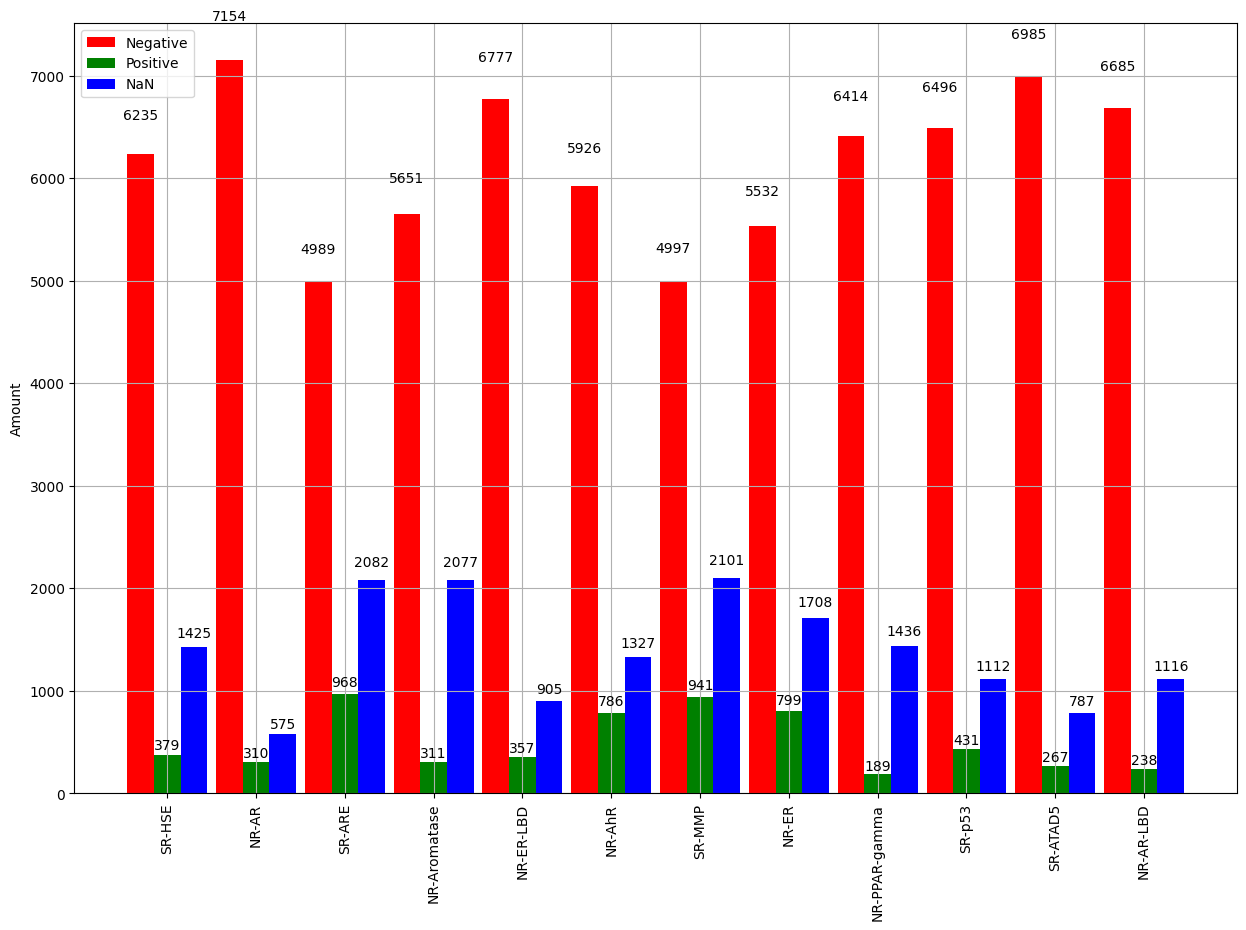

In [8]:
counter_plot(targets)